<h1>Clustering With K Means - Python</h1>

In [1]:
# Import all the required Python Libraries
import pandas as pd  #For Reading Datasets
import numpy as np # For Computations
import matplotlib.pyplot as plt  # For Visulation
from pandas import DataFrame # For creating DataFrames
from sklearn.cluster import KMeans

In [2]:
#Let's take some datas for the work 
# For this example we will be using only these 19 datapoints
data = {'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]}

#Now convert the above data to DataFrame   
df = DataFrame(data, columns=['x','y'])
df.head()

,x,y
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


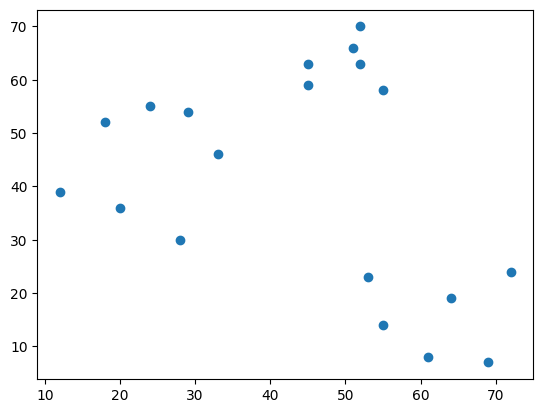

In [3]:
# Let's visualize the data in the scatter plot first
plt.scatter(df['x'],df['y'])
plt.show()

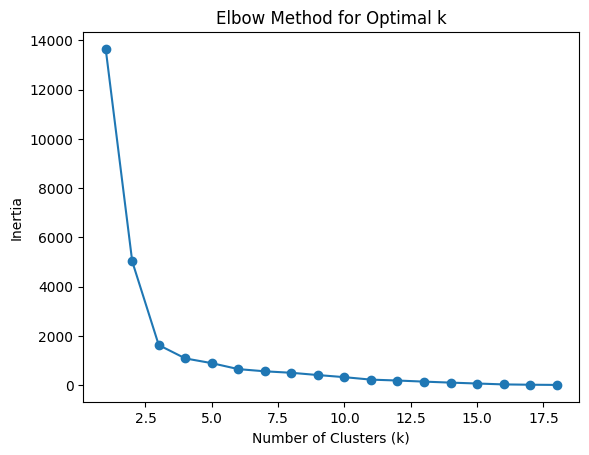

In [4]:
# Looking at the above data, it looks like optimal value of k should be 3. But let's find out it using elbow Method
# Choose K: Decide on the number of clusters. 
# For choosing value of K (optimal clusters), we will be using the Elbow Method
inertia_values = []
k_values = range(1, df.shape[0])
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)
# Plot the Elbow Curve
plt.plot(k_values, inertia_values, '-o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [5]:
# Elbow method suggests optimal value of k for the above dataset is 3.
# Let's create and fit the KMeans model
kmeans = KMeans(n_clusters=3)
pred_labels = kmeans.fit_predict(df)

#Find the cetroids of the cluster
centroids = kmeans.cluster_centers_
centroids

array([[23.42857143, 44.57142857],
       [62.33333333, 15.83333333],
       [50.        , 63.16666667]])

In [6]:
#Get the associated cluster for each data labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [7]:
# Adding cluster for visualizing in the same table
df['cluster'] = pred_labels
df.head()

,x,y,cluster
0,12,39,0
1,20,36,0
2,28,30,0
3,18,52,0
4,29,54,0


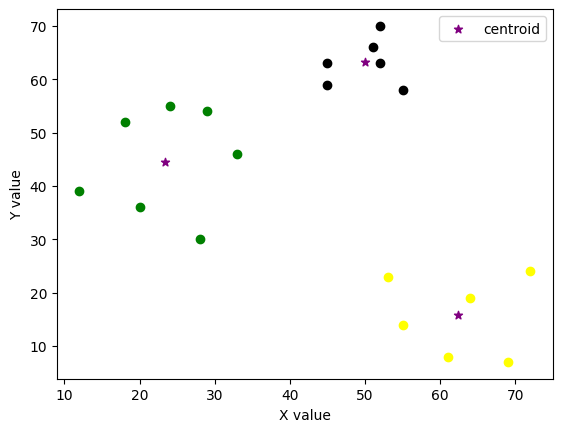

In [8]:
#Display the cluster content and their centroids
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.x,df1.y,color='green')
plt.scatter(df2.x,df2.y,color='yellow')
plt.scatter(df3.x,df3.y,color='black')
plt.scatter(centroids[:,0],centroids[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.legend()

In [9]:
# Now finally use the model to predict the cluster(s) of another input(s) 
kmeans.predict([[20,20],[40,60], [60,24]])

/home/krishna/jupyter/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 2, 1], dtype=int32)

In [10]:
# Model is predicting the value correctly...

<h1>Preprocessing using min max scaler</h1>

In [11]:
#Scaling is needed when features have different units or ranges, as it improves model performance and convergence in machine learning.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['x']])
df['x'] = scaler.transform(df[['x']])

scaler.fit(df[['y']])
df['y'] = scaler.transform(df[['y']])

df.drop('cluster', axis=1, inplace=True)


df.head()

,x,y
0,0.000000,0.507937
1,0.133333,0.460317
2,0.266667,0.365079
3,0.100000,0.714286
4,0.283333,0.746032


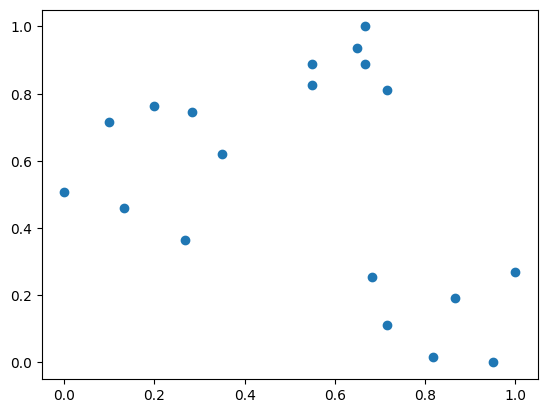

In [12]:
plt.scatter(df['x'], df['y'])

In [13]:
kmeans = KMeans(n_clusters=3)
pred_label = kmeans.fit_predict(df[['x','y']])
pred_label

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [14]:
df['cluster']=pred_labels
df.head()

,x,y,cluster
0,0.000000,0.507937,0
1,0.133333,0.460317,0
2,0.266667,0.365079,0
3,0.100000,0.714286,0
4,0.283333,0.746032,0


In [15]:
kmeans.cluster_centers_

array([[0.63333333, 0.89153439],
       [0.83888889, 0.14021164],
       [0.19047619, 0.59637188]])

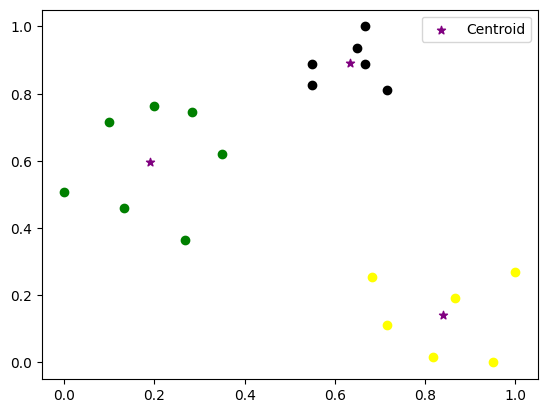

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.x, df1.y, color='green')
plt.scatter(df2.x,df2.y,color='yellow')
plt.scatter(df3.x,df3.y,color='black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],color='purple', marker='*', label='Centroid')
plt.legend()